<a href="https://colab.research.google.com/github/rafaelhonorato03/Python/blob/main/Potenciometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Potenciometria

As titulações potenciométricas são altamente precisas e exatas, proporcionando dados mais confiáveis do que as titulações com indicadores químicos. Elas são especialmente úteis em soluções coloridas ou turvas, eliminando a necessidade de medições exatas de potencial em cada ponto, pois dependem apenas da variação do potencial da reação principal. No entanto, a desvantagem é a necessidade de realizar cálculos adicionais para traduzir as medições em concentrações da amostra.

Este artigo apresenta uma solução para simplificar esses cálculos e melhorar a visualização de dados por meio de uma aplicação em Python.

## Titulação

A titulação é um procedimento analítico em que uma substância padrão é gradualmente adicionada a uma solução contendo o analito ou vice-versa. O padrão e o analito reagem em uma reação conhecida e rápida. A adição é interrompida quando se considera que todo o analito foi consumido, e não há excesso do padrão, como era comum nos métodos com indicadores químicos. Em métodos potenciométricos, o ponto final é determinado por meio de tratamento de dados e, em muitos casos, a titulação deve continuar.

Na primeira titulação registrada na história da química, conchas moídas de carbonato de cálcio eram adicionadas gradualmente ao vinagre para indicar a acidez do mosto que fermentava. O ponto final era determinado pelo término da efervescência, indicando o consumo de todos os ácidos. Nesse método antigo, a quantidade de matéria era medida, não a concentração do analito. Esses princípios ainda são válidos, embora os instrumentos e métodos de determinar o ponto estequiométrico tenham evoluído significativamente.

Um sistema de titulação potenciométrica é montado usando medição potenciométrica (um milivoltímetro eletrônico, eletrodo indicador e eletrodo de referência), juntamente com agitação e uma bureta (ou outro medidor de volume preciso). Nos últimos anos, esses equipamentos foram automatizados para criar tituladores automáticos.

### Ponto de equivalência

O principal desafio na titulação é identificar o ponto em que as substâncias reagentes estão em quantidades equivalentes. Na titulação potenciométrica, esse ponto deve coincidir com o ponto de inflexão na curva resultante de E (potencial em mV) em função de V (volume em mL), onde E é o potencial medido e V é o volume de titulante adicionado. Determinar com precisão esse ponto na curva é complexo e propenso a erros. O ponto de máxima variação de potencial, ou seja, o ponto de inflexão, pode ser com maior segurança identificado usando o método da primeira derivada.

Para aplicar esse método com sucesso, é necessário realizar várias medições de potencial ao redor do ponto de equivalência, incluindo adições muito pequenas de volume antes e depois desse ponto. Para criar o gráfico da primeira derivada, é necessário calcular uma nova série de pontos a partir dos valores originais de E e V. Isso envolve calcular a variação de E em relação à variação de V entre cada ponto. Além disso, a abscissa da primeira derivada é calculada como o volume médio, obtido pela média das abscissas de um ponto e do ponto anterior.

Esses dados são essenciais para a construção do gráfico da primeira derivada. Uma análise mais clara do ponto final da titulação pode ser obtida ao calcular a segunda derivada a partir dos dados da primeira derivada. Nesse caso, a ordenada é a diferença entre a ordenada de um ponto e a do ponto anterior, ou seja, Δ(ΔE/ΔV). Cada ponto na nova ordenada é então plotado em relação ao volume médio de cada par de pontos no eixo x da primeira derivada (média da abscissa de um ponto menos a abscissa do ponto anterior). Matematicamente, a geração de derivadas experimentais de primeira e segunda ordem é uma boa aproximação das derivadas matemáticas da função original. No entanto, deve-se notar que a segunda derivada nem sempre é a melhor opção em relação à primeira derivada, já que pode amplificar os ruídos experimentais. Em casos onde os dados originais não são muito precisos, a primeira derivada pode ser a opção mais confiável.

## Bibliotecas utilizadas

### Mollmass

O Molmass é uma biblioteca Python e aplicação web que calcula a massa molecular, composição elementar e espectro de distribuição de massa de uma molécula com base em sua fórmula química ou pesos relativos dos elementos. Ele usa a composição isotópica dos elementos, mas não considera a deficiência de massa devido a ligações químicas. A biblioteca também possui uma base de dados de propriedades físico-químicas dos elementos químicos.

### Pandas
O Pandas é uma ferramenta de código aberto para análise e manipulação de dados, rápida, poderosa, flexível e fácil de usar, construída com base na linguagem de programação Python.

### Matplotlib
Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. Matplotlib torna as tarefas simples fáceis e as tarefas difíceis possíveis. Crie gráficos de alta qualidade para publicação.
Faça figuras interativas com zoom, pan e atualizações. Personalize o estilo visual e o layout. Exporte para vários formatos de arquivo.
Incorpore em JupyterLab e Interfaces Gráficas. Utilize uma ampla variedade de pacotes de terceiros construídos sobre o Matplotlib.

### NumPy
O NumPy é a biblioteca essencial para computação científica em Python. Ele oferece um objeto de matriz multidimensional, objetos relacionados e muitas funções para operações rápidas em arrays, incluindo matemáticas, lógicas, manipulação de forma, ordenação, seleção, E/S, transformadas de Fourier discretas, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais.

## Instalando as bibliotecas necessárias

In [48]:
# instaalação molmass
!pip install molmass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 1.8 MB/s eta 0:00:00


In [43]:
# instalação pandas
!pip install pandas

In [ ]:
#instalação matplotlib
pip install matplotlib

In [ ]:
#instalação numpy
pip install numpy

In [49]:
# importando bilbiotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from molmass import Formula

In [2]:
# importando arquivo com os dados coletados experimentalmente de volume titulado e pH
from google.colab import files
uploaded = files.upload()

Saving Potenciometria.xlsx to Potenciometria.xlsx


In [60]:
# obtendo informações das substâncias da análise?
padrao = input("Qual o padrão utilizado na análise? ")
padrao_conc = float(input("Qual a concentração do padrão utilizado na análise? "))
analito = input("Qual o seu analito? ")
analito_m = float(input("Qual a massa do analito antes da análise? "))

Qual o padrão utilizado na análise? NaOH
Qual a concentração do padrão utilizado na análise? 0.94066
Qual o seu analito? C9H8O4
Qual a massa do analito antes da análise? 404.6


In [61]:
# Visualizando os primeiro arquivos do DataFramae
nome_arquivo = input("Qual o nome da planilha com a base de dados importada? ")
nome_arquivo = nome_arquivo+'.xlsx'

# Abra o DataFrame importado
df = pd.read_excel(nome_arquivo)

# Visualize os primeiros registros do DataFrame
df.head()

Qual o nome da planilha com a base de dados importada? Potenciometria


,V NaOH (mL),pH
0,17.0,4.98
1,18.0,6.01
2,18.2,6.10
3,18.4,6.22
4,18.6,6.39


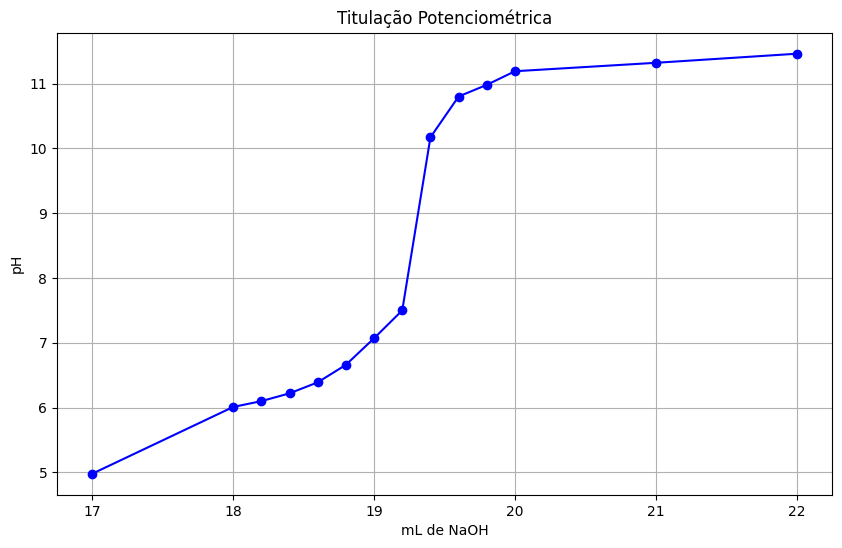

    V NaOH (mL)     pH    Vm  ΔpH/ΔV   V',   Δ2pH/ΔV2
0          17.0   4.98   NaN     NaN   NaN        NaN
1          18.0   6.01  17.5     NaN   NaN        NaN
2          18.2   6.10  18.1    0.45   NaN        NaN
3          18.4   6.22  18.3    0.60  18.2        NaN
4          18.6   6.39  18.5    0.85  18.4   1.250000
5          18.8   6.66  18.7    1.35  18.6   2.500000
6          19.0   7.07  18.9    2.05  18.8   3.500000
7          19.2   7.50  19.1    2.15  19.0   0.500000
8          19.4  10.17  19.3   13.35  19.2  56.000000
9          19.6  10.80  19.5    3.15  19.4 -51.000000
10         19.8  10.98  19.7    0.90  19.6 -11.250000
11         20.0  11.19  19.9    1.05  19.8   0.750000
12         21.0  11.32  20.5    0.13  20.2  -1.533333
13         22.0  11.46  21.5    0.14  21.0   0.010000


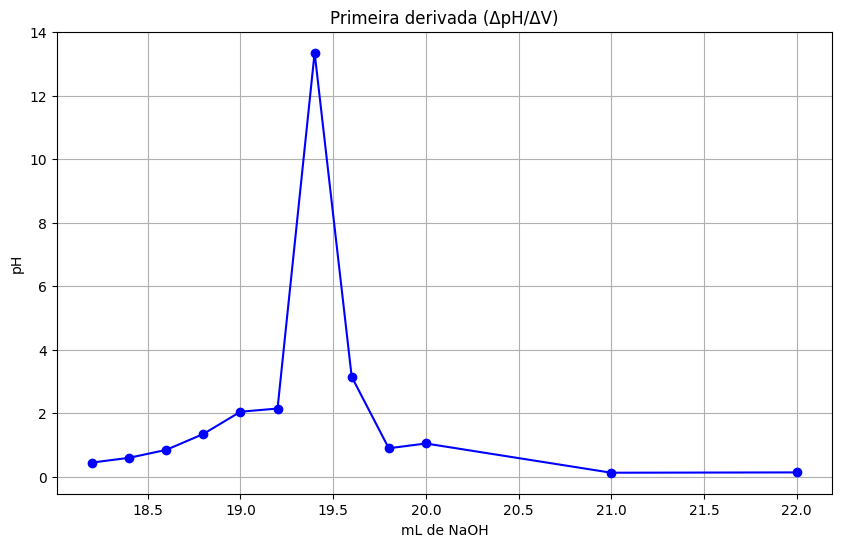

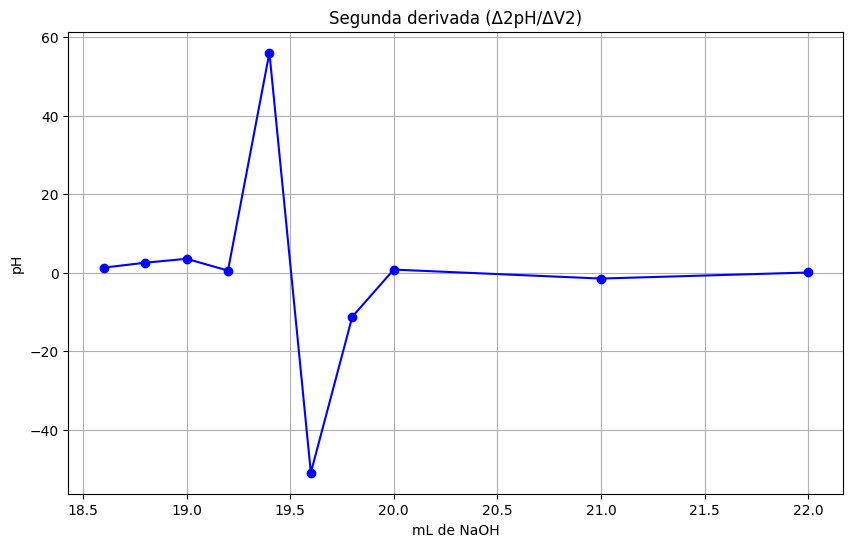

In [63]:
# Criando o gráfico mL x pH
coluna_x = df.columns[0]
coluna_y = df.columns[1]

plt.figure(figsize=(10, 6))
plt.plot(df[coluna_x], df[coluna_y], marker='o', linestyle='-', color='b', markersize=6)
plt.title('Titulação Potenciométrica')
plt.xlabel(f'mL de {padrao}')
plt.ylabel('pH')
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Adicionando uma nova coluna 'Vm' calculada como a média de 'mL' e 'pH'
for i in range(1, len(df)):
    df.loc[i, "Vm"] = (df.loc[i, coluna_x] + df.loc[i-1, coluna_x]) / 2

# Adicionando uma nova coluna 'ΔpH/ΔV' calculada como a primeira derivada de pH e V'
for i in range(2, len(df)):
    df.loc[i, "ΔpH/ΔV"] = (df.loc[i, coluna_y] - df.loc[i-1, coluna_y]) / (df.loc[i, coluna_x] - df.loc[i-1, coluna_x])

# Adicionando uma nova coluna 'V'' calculada como a média de 'Vm'
for i in range(3, len(df)):
    df.loc[i, "V',"] = (df.loc[i, "Vm"] + df.loc[i-1, "Vm"]) / 2

# Adicionando uma nova coluna 'Δ2pH/ΔV2' calculada como a segunda derivada de pH e V'
for i in range(4, len(df)):
    df.loc[i, "Δ2pH/ΔV2"] = (df.loc[i, "ΔpH/ΔV"] - df.loc[i-1, "ΔpH/ΔV"]) / (df.loc[i, "Vm"] - df.loc[i-1, "Vm"])

threshold = 0.1
df_high = df[df["Δ2pH/ΔV2"] > threshold]

# Exibindo o DataFrame com a nova coluna 'Vm'
print(df)

#Exibindo o gráfico da primeira derivada
plt.figure(figsize=(10, 6))
plt.plot(df[coluna_x], df['ΔpH/ΔV'], marker='o', linestyle='-', color='b', markersize=6)
plt.title('Primeira derivada (ΔpH/ΔV)')
plt.xlabel(f'mL de {padrao}')
plt.ylabel('pH')
plt.grid(True)

plt.show()

#Exibindo o gráfico da segunda derivada
plt.figure(figsize=(10, 6))
plt.plot(df[coluna_x], df['Δ2pH/ΔV2'], marker='o', linestyle='-', color='b', markersize=6)
plt.title('Segunda derivada (Δ2pH/ΔV2)')
plt.xlabel(f'mL de {padrao}')
plt.ylabel('pH')
plt.grid(True)

plt.show()


In [64]:
# destacando valores máximos no novo DataFrame
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_max)

,V NaOH (mL),pH,Vm,ΔpH/ΔV,"V',",Δ2pH/ΔV2
0,17.000000,4.980000,nan,nan,nan,nan
1,18.000000,6.010000,17.500000,nan,nan,nan
2,18.200000,6.100000,18.100000,0.450000,nan,nan
3,18.400000,6.220000,18.300000,0.600000,18.200000,nan
4,18.600000,6.390000,18.500000,0.850000,18.400000,1.250000
5,18.800000,6.660000,18.700000,1.350000,18.600000,2.500000
6,19.000000,7.070000,18.900000,2.050000,18.800000,3.500000
7,19.200000,7.500000,19.100000,2.150000,19.000000,0.500000
8,19.400000,10.170000,19.300000,13.350000,19.200000,56.000000
9,19.600000,10.800000,19.500000,3.150000,19.400000,-51.000000


In [65]:
# Relacionando os valores máximos da segunda derivada para encontrar o ponto de equivalencia

ma_dev2 = float(input("Digite o ponto do maior valor da segunda derivada (Δ2pH/ΔV2): "))
me_dev2 = float(input("Digite o ponto do menor valor da segunda derivada (Δ2pH/ΔV2): "))
ma_v = float(input("Digite o ponto da V' relacionado ao maior valor da segunda derivada: "))
me_v = float(input("Digite o ponto da V' relacionado ao menor valor da segunda derivada: "))

# Interpolação para determinar o ponto de equivalência
ponto_equiv = (((ma_dev2 - 0) / (ma_dev2 - me_dev2))*(me_v - ma_v)) + ma_v

print(f"O volume padrão titulado no ponto de equivalência foi de: {ponto_equiv:.8f} mL")

Digite o ponto do maior valor da segunda derivada (Δ2pH/ΔV2): 56
Digite o ponto do menor valor da segunda derivada (Δ2pH/ΔV2): -51
Digite o ponto da V' relacionado ao maior valor da segunda derivada: 19.2
Digite o ponto da V' relacionado ao menor valor da segunda derivada: 19.4
O volume padrão titulado no ponto de equivalência foi de: 19.30467290 mL


In [71]:
# Obtendo dados da massa molar do padrão
f = Formula(padrao)
padrao_mass = f.mass

# Obtendo dados da massa molar do analito
f = Formula(analito)
analito_mass = f.mass

# Obtendo a massa real do analito
m_analito = (analito_mass/10) * padrao_conc * ponto_equiv

# Obtendo o teor do analito
teor = (m_analito/analito_m)*100

print(f'A massa molar do {padrao} é igual a {padrao_mass}')
print(f'A massa molar do {analito} é: {analito_mass}')
print()
print(f'A massa do {analito} analisado foi de {m_analito:.2f} mg')
print(f'O teor do {analito} na sua amostra é de {teor:.2f}%')

A massa molar do NaOH é igual a 39.99711528
A massa molar do C9H8O4 é: 180.157808

A massa do C9H8O4 analisado foi de 327.15 mg
O teor do C9H8O4 na sua amostra é de 80.86%


Bibliografia

ARAÚJO, Hiram; IRIS, Ademário. E-book - Análise Instrumental - Uma Abordagem Prática. [Digite o Local da Editora]: Grupo GEN, 2021. E-book. ISBN 9788521637486. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637486/. Acesso em: 11 out. 2023.

https://pypi.org/project/molmass/

https://matplotlib.org/

https://pandas.pydata.org/